# Chronic Kidney Disease Analysis

 An application that can be used across biomedical data science projects. The dataset used for the proof of concept can help physicians better understand chronic kidney disease (CKD) using numerous measurements and biomarkers that have been collected. 

## Description

This project is a display of what can be done with machine learning in order to make some analysis over data such as the Chronic Kidney Disease dataset.

### Table of Contents


* [CDK Prediction](#chapter1)
    * [Data loading](#section_1_1)
    * [Split dataset](#Section_1_2)
    * [Seperate input and output](#section_1_3)
    * [Prediction](#section_1_4)
    * [Model prediction test](#section_1_5)
    * [Import saved model and use it](#section_1_6)
* [CDK factors](#chapter2)
    * [Feature importance](#section_2_1)
    * [HeatMap](#section_2_2)
* [CDK subtypes](#chapter3)
  * [Contributions](#section_3_1)
  * [Clusters](#section_3_2)








Relevant Information:

			age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class	


Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 

Attribute Information :

		1.Age(numerical)
			age in years
		2.Blood Pressure(numerical)
				bp in mm/Hg
		3.Specific Gravity(nominal)
			sg - (1.005,1.010,1.015,1.020,1.025)
		4.Albumin(nominal)
			al - (0,1,2,3,4,5)
		5.Sugar(nominal)
			su - (0,1,2,3,4,5)
		6.Red Blood Cells(nominal)
			rbc - (normal,abnormal)
		7.Pus Cell (nominal)
			pc - (normal,abnormal)
		8.Pus Cell clumps(nominal)
			pcc - (present,notpresent)
		9.Bacteria(nominal)
			ba  - (present,notpresent)
		10.Blood Glucose Random(numerical)		
			bgr in mgs/dl
		11.Blood Urea(numerical)	
			bu in mgs/dl
		12.Serum Creatinine(numerical)	
			sc in mgs/dl
		13.Sodium(numerical)
			sod in mEq/L
		14.Potassium(numerical)	
			pot in mEq/L
		15.Hemoglobin(numerical)
			hemo in gms
		16.Packed  Cell Volume(numerical)
		17.White Blood Cell Count(numerical)
			wc in cells/cumm
		18.Red Blood Cell Count(numerical)	
			rc in millions/cmm
		19.Hypertension(nominal)	
			htn - (yes,no)
		20.Diabetes Mellitus(nominal)	
			dm - (yes,no)
		21.Coronary Artery Disease(nominal)
			cad - (yes,no)
		22.Appetite(nominal)	
			appet - (good,poor)
		23.Pedal Edema(nominal)
			pe - (yes,no)	
		24.Anemia(nominal)
			ane - (yes,no)
		25.Class (nominal)		
			class - (ckd,notckd)

### CDK Prediction <a class="anchor" id="chapter1"></a>

In [11]:
from src import ETL_tool as ETL
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor
from pandas import DataFrame, Series, merge, set_option
from sklearn.cluster import KMeans
import seaborn as sns
from autogluon.features import AutoMLPipelineFeatureGenerator
from matplotlib import pyplot as plt
import lightgbm as lgm
import numpy as np

set_option('display.max_columns', None)


#### Data loading <a class="anchor" id="section_1_1"></a>

In [12]:

df = ETL.load_data("data/chronic_kidney_disease_full.arff")
print(df.head(5))
print(df.shape)
print(df.describe())


    age    bp     sg al su     rbc        pc         pcc          ba    bgr  \
0  48.0  80.0  1.020  1  0     NaN    normal  notpresent  notpresent  121.0   
1   7.0  50.0  1.020  4  0     NaN    normal  notpresent  notpresent    NaN   
2  62.0  80.0  1.010  2  3  normal    normal  notpresent  notpresent  423.0   
3  48.0  70.0  1.005  4  0  normal  abnormal     present  notpresent  117.0   
4  51.0  80.0  1.010  2  0  normal    normal  notpresent  notpresent  106.0   

   ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]
(400, 25)
              age          bp         bgr          bu          sc         sod  \
count  39

####  Split dataset <a class="anchor" id="section_1_2"></a>

In [13]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=1)
print(df_train.shape)
print(df_test.shape)

(268, 25)
(132, 25)


#### Seperate input and output <a class="anchor" id="section_1_3"></a>

In [14]:
test_data = df_test.drop(['class'], axis=1)
print(test_data.shape)
print(test_data.head(5))

(132, 24)
      age    bp     sg   al   su     rbc      pc         pcc          ba  \
398  17.0  60.0  1.025    0    0  normal  normal  notpresent  notpresent   
125  72.0  90.0    NaN  NaN  NaN     NaN     NaN  notpresent  notpresent   
328  28.0  70.0  1.020    0    0  normal  normal         NaN         NaN   
339  25.0  70.0  1.020    0    0  normal  normal  notpresent  notpresent   
172  62.0  80.0  1.010    1    2     NaN     NaN  notpresent  notpresent   

       bgr  ...  hemo   pcv     wbcc  rbcc  htn   dm  cad  appet  pe ane  
398  114.0  ...  14.2  51.0   7200.0   5.9   no   no   no   good  no  no  
125  308.0  ...   NaN   NaN      NaN   NaN  yes  yes   no   poor  no  no  
328  131.0  ...   NaN  45.0   8600.0   6.5   no   no   no   good  no  no  
339   88.0  ...  13.3  48.0   7000.0   4.9   no   no   no   good  no  no  
172  309.0  ...  10.6  34.0  12800.0   4.9   no   no   no   good  no  no  

[5 rows x 24 columns]


#### Prediction <a class="anchor" id="section_1_4"></a>

When the fit method is used the autogluon algorithm can determine the type of output the model needs to predict. In this case, it chooses the binary classification as there are only two kinds of output classes "ckd" and "notckd", which is wether the individual has a chronic kidney disease or not. The fit method chooses the most appropriate models for this task and trains them all. The training set is automatically split with a validation set in order to know how to optimise the models.

In [5]:
predictor = TabularPredictor(label='class').fit(train_data=df_train, verbosity=2, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20230702_213736\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230702_213736\"
AutoGluon Version:  0.8.2
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   36.29 GB / 478.87 GB (7.6%)
Train Data Rows:    268
Train Data Columns: 24
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['notckd', 'ckd']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = notckd, class 0 = ckd

The fit_summary method shows the details of each model training such as the prediction score on the validation dataset (score_val), the time it took to train the model (fit_time), the time it took to run the model  on the validation dataset (pred_time_val), how many times it got retrained (fit_time_m)

In [6]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMXT_BAG_L1   1.000000       0.233871  13.442483                0.233871          13.442483            1       True          3
1       WeightedEnsemble_L2   1.000000       0.236869  16.542738                0.002998           3.100255            2       True         14
2    NeuralNetFastAI_BAG_L1   1.000000       0.472729  42.422261                0.472729          42.422261            1       True         10
3     ExtraTreesEntr_BAG_L1   0.996269       0.250859   1.360399                0.250859           1.360399            1       True          9
4   RandomForestGini_BAG_L1   0.996269       0.277844   1.757026                0.277844           1.757026            1       True          5
5     ExtraTreesGini_BAG_L1   0.996269       0.330810   1.738003                

c:\Users\dvdrb\Documents\code\projet_m2i\Chronic_Kidney_Disease_Analysis\venv\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6753731343283582,
  'KNeighborsDist_BAG_L1': 0.6940298507462687,
  'LightGBMXT_BAG_L1': 1.0,
  'LightGBM_BAG_L1': 0.9925373134328358,
  'RandomForestGini

The leaderbord method shows the statistics of each model training sorted by the effectiveness of the method on the training set (score_test). I would have sorted it by the score from the validation set which is the most important factor that determines which model is the best. We can see that the weighted model that is considered the best is as precise as the light GBMXT model but has the best marginal prediction time. The NeuralNet FastAI model is the most precise but the slowest which can be acceptable for this case as we don't need to predict in real time.

In [7]:
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,1.000000,0.694030,0.069995,0.027212,0.022759,0.069995,0.027212,0.022759,1,True,2
1,ExtraTreesGini_BAG_L1,1.000000,0.996269,0.197887,0.330810,1.738003,0.197887,0.330810,1.738003,1,True,8
2,RandomForestEntr_BAG_L1,1.000000,0.996269,0.232898,0.447743,1.379600,0.232898,0.447743,1.379600,1,True,6
3,RandomForestGini_BAG_L1,1.000000,0.996269,0.240413,0.277844,1.757026,0.240413,0.277844,1.757026,1,True,5
4,ExtraTreesEntr_BAG_L1,1.000000,0.996269,0.259851,0.250859,1.360399,0.259851,0.250859,1.360399,1,True,9
5,LightGBMLarge_BAG_L1,1.000000,0.992537,0.352796,0.156909,13.124398,0.352796,0.156909,13.124398,1,True,13
6,NeuralNetTorch_BAG_L1,1.000000,0.992537,0.488729,0.355800,29.268425,0.488729,0.355800,29.268425,1,True,12
7,XGBoost_BAG_L1,1.000000,0.988806,0.494725,0.189888,13.382499,0.494725,0.189888,13.382499,1,True,11
8,NeuralNetFastAI_BAG_L1,1.000000,1.000000,3.006343,0.472729,42.422261,3.006343,0.472729,42.422261,1,True,10
9,CatBoost_BAG_L1,0.996269,0.992537,0.218873,0.174899,97.994980,0.218873,0.174899,97.994980,1,True,7


#### Model prediction test <a class="anchor" id="section_1_5"></a>


In [13]:
y_pred = predictor.predict(test_data)
df_pred = DataFrame(y_pred, columns=['class'])
df_pred

,class
398,notckd
125,ckd
328,notckd
339,notckd
172,ckd
...,...
12,ckd
309,ckd
399,notckd
333,notckd


In [14]:
predictor.evaluate(df_test)

Evaluation: accuracy on test data: 0.9848484848484849
Evaluations on test data:
{
    "accuracy": 0.9848484848484849,
    "balanced_accuracy": 0.9821428571428572,
    "mcc": 0.969309258988296,
    "roc_auc": 1.0,
    "f1": 0.9818181818181818,
    "precision": 1.0,
    "recall": 0.9642857142857143
}


{'accuracy': 0.9848484848484849,
 'balanced_accuracy': 0.9821428571428572,
 'mcc': 0.969309258988296,
 'roc_auc': 1.0,
 'f1': 0.9818181818181818,
 'precision': 1.0,
 'recall': 0.9642857142857143}

#### Import saved model and use it <a class="anchor" id="section_1_6"></a>

In [15]:
#with model : "WeightedEnsemble_L2"
#predictor.delete_models(models_to_keep='best',dry_run=False)
predictor = TabularPredictor.load("AutogluonModels/ag-20230702_213736/")
y_pred = predictor.predict(test_data)
df_pred = DataFrame(y_pred, columns=['class'])
df_pred

,class
398,notckd
125,ckd
328,notckd
339,notckd
172,ckd
...,...
12,ckd
309,ckd
399,notckd
333,notckd


### CDK factors <a class="anchor" id="chapter2"></a>

The approach taken to find the CDK factors from the dataset is to find which features are the most relevent into having CDK. 

#### Feature importance <a class="anchor" id="section_2_1"></a>

The feature_importance method from the autogluon prediction model shows which kidney Disease factors have the most importance. A feature’s importance score represents the performance drop that results when the model makes predictions on a perturbed copy of the data where this feature’s values have been randomly shuffled across rows. It has been computed from the multiple training with the different models.

 It seems that the red blood cells (rbc), hemoglobin (hemo) and the serum creatinine (sc) are the biggest factors in determining chronic kidney disease from this dataset.
The anemia (ane), appetite (appet), coronary artery disease (cad), specific gravity (sg), sugar (su), white blood cell count (wbcc), pus cell clumps (pcc) and bacteria (ba) all don't seem to foctor in the CKD however the dataset might not be big enough in order to distinguish relations with these parameters.

In [ ]:
predictor.feature_importance(data=df_train)

,importance,stddev,p_value,n,p99_high,p99_low
rbc,0.087313,0.008986,0.000013,5,0.105816,0.068811
hemo,0.021642,0.007647,0.001596,5,0.037387,0.005897
sc,0.011194,0.005900,0.006618,5,0.023342,-0.000954
pcv,0.009701,0.004254,0.003494,5,0.018461,0.000942
rbcc,0.008209,0.004865,0.009777,5,0.018226,-0.001808
dm,0.007463,0.002638,0.001599,5,0.012895,0.002030
sod,0.005224,0.003337,0.012448,5,0.012096,-0.001648
bgr,0.003731,0.003731,0.044505,5,0.011414,-0.003952
pot,0.002985,0.001669,0.008065,5,0.006421,-0.000451
htn,0.002985,0.003122,0.049650,5,0.009413,-0.003443


#### HeatMap <a class="anchor" id="section_2_2"></a>


Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable) Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

We can see the correlation between the class (cdk or notcdk) and the other features on the last row or column. However, the non numerical features aren't included in it. With this, we can see strong correlation between chronic kidney disease and hemoglobin (hemo), packed cell volume (pcv), red blood cells (rbcc). We can also observe strong relations between packed cell volume (pcv), hemoglobin (hemo) and red blood cells (rbcc). These features might be redundant if they are so correlated together.

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_2816\1472764295.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = new_df.corr()


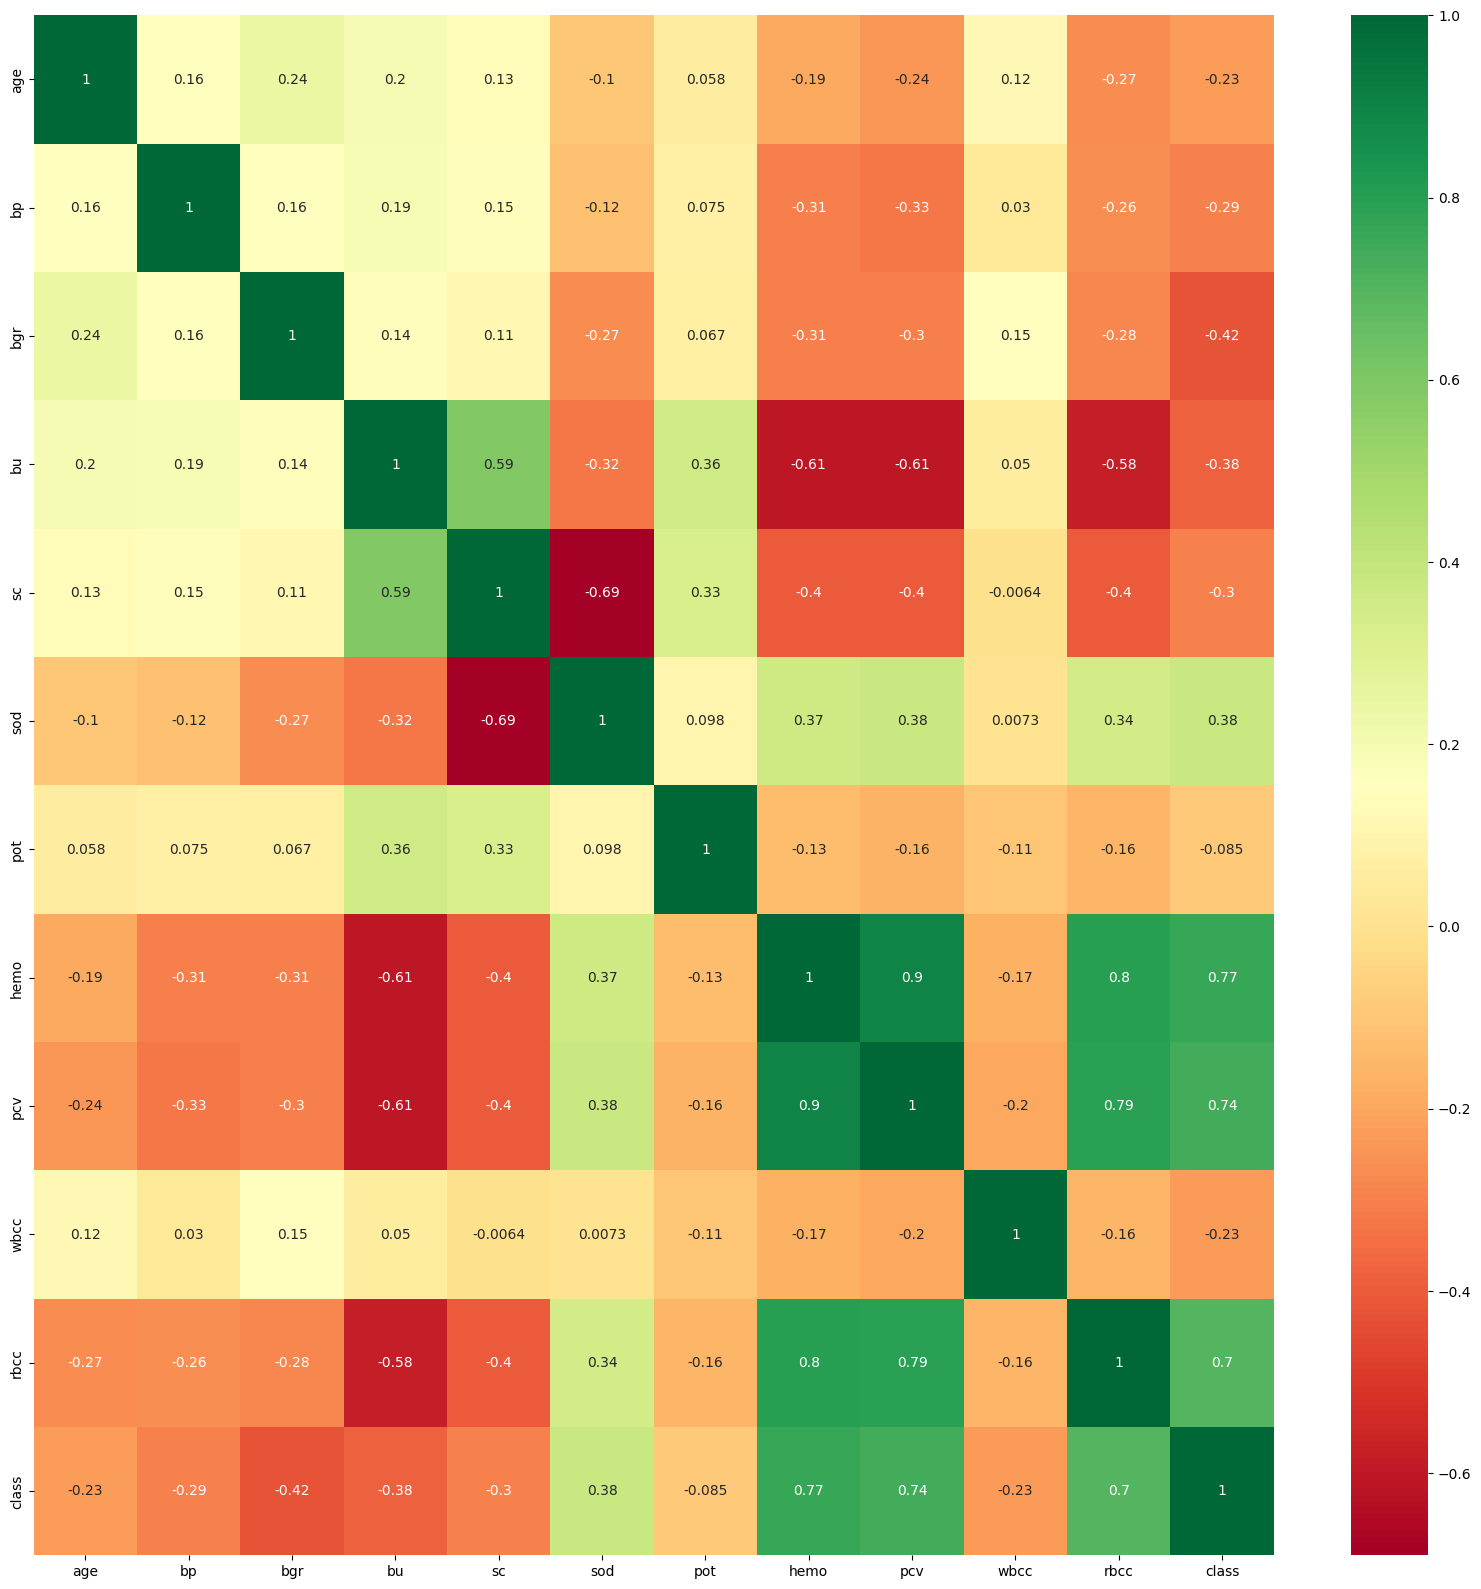

In [7]:

auto_ml_pipeline_feature_generator = AutoMLPipelineFeatureGenerator()
new_df = auto_ml_pipeline_feature_generator.fit_transform(X=df)

X=new_df.drop(['class'],axis=1)
y=new_df['class']

#get correlations of each features in dataset
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(new_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### CDK subtypes <a class="anchor" id="chapter3"></a>

Potential CDK subtypes exploration can be interpreted as clusters contribution to a specific feature.


#### Contributions <a class="anchor" id="section_3_1"></a>

Feeding prediction contribution data to a KMean clustering algorithm will result in a set of identified groups that depict within-group similarities on how all the features work together on signaling the model how it should predict the observations in that group.
In order to get the contribution table, we need to feed the dataset to a lightGBM or XGBoost model. It is a matrix that provides contribution scores to individual features when predicting CDK class following the SHAP algorithm.


In [26]:


auto_ml_pipeline_feature_generator = AutoMLPipelineFeatureGenerator()
new_df = auto_ml_pipeline_feature_generator.fit_transform(X=df)
#new_df = new_df.dropna()
X=new_df.drop(['class'],axis=1)
columns = list(X.columns)
y=new_df['class']

#we create a basic lightGBM model :
X_train = lgm.Dataset(X, y)
parameters = {
    "max_depth":3,
    "random_state": 43
}

#we train our model
basic_model = lgm.train(parameters,train_set = X_train)

#We create a contributions table
contributions = basic_model.predict(X, pred_contrib = True)
dataframe_contributions = DataFrame(contributions, columns = columns+["expected_value"]).drop(['expected_value'], axis = 1)
dataframe_contributions


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 24
[LightGBM] [Info] Start training from score 0.375000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,-0.006975,-0.003416,0.012998,-0.002761,-0.019249,-0.021152,-0.032666,0.169974,0.004082,-0.002202,0.044691,0.126418,-0.062922,0.0,-0.137065,-0.006238,0.0,0.0,-0.056341,-0.003828,0.0,0.000147,0.001873,0.0
1,-0.038179,0.002832,-0.015901,-0.029290,0.023223,-0.025465,-0.019342,-0.217984,-0.011585,-0.004012,-0.087453,0.093122,-0.043636,0.0,-0.053061,-0.001780,0.0,0.0,0.005106,0.002104,0.0,0.000147,0.001546,0.0
2,-0.009217,-0.002021,-0.039253,0.007050,-0.048160,-0.005736,-0.010601,-0.175311,-0.007108,-0.000212,-0.033898,-0.066483,-0.008851,0.0,0.015400,-0.003001,0.0,0.0,0.002201,0.001268,0.0,-0.000424,0.000630,0.0
3,-0.014252,0.001913,0.005255,0.008283,-0.056540,-0.005599,-0.004470,-0.202047,-0.009242,-0.005683,-0.050332,-0.032381,-0.026721,0.0,0.015918,0.007385,0.0,0.0,-0.014659,0.000462,0.0,-0.000774,-0.010755,0.0
4,-0.001852,-0.001914,0.014177,-0.016067,-0.062448,-0.005485,-0.010006,-0.207631,-0.011782,-0.008176,0.044911,-0.081211,-0.007903,0.0,0.015144,-0.003608,0.0,0.0,0.003714,0.000229,0.0,0.000147,0.000630,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.008343,-0.002161,-0.004940,0.003982,0.079638,0.011771,0.010989,0.234914,0.014002,-0.005985,0.066798,0.140696,0.026001,0.0,0.036180,-0.008767,0.0,0.0,0.008470,0.001010,0.0,0.000140,0.001873,0.0
396,0.016379,0.005450,0.010206,-0.013586,0.031781,0.006575,0.008247,0.263422,0.029006,0.006747,0.064863,0.145726,0.026913,0.0,0.032192,-0.008814,0.0,0.0,0.008470,0.002817,0.0,0.000389,0.001873,0.0
397,-0.021496,-0.011657,0.029830,-0.009506,0.073299,-0.006166,0.009002,0.240199,0.037130,-0.019446,0.065729,0.158881,0.029496,0.0,0.040654,-0.008390,0.0,0.0,0.008470,0.002817,0.0,0.000389,0.001873,0.0
398,-0.018781,0.005504,0.019801,0.001164,0.070035,-0.004506,0.008065,0.236122,0.033628,-0.013119,0.072532,0.154051,0.029367,0.0,0.038525,-0.008893,0.0,0.0,0.008213,0.002190,0.0,0.000389,0.001873,0.0


####  Clusters <a class="anchor" id="section_3_2"></a>

We’ll be feeding this dataset to a KMeans algorithm in order to identify trends or clusters within our prediction contributions. It would be interesting to remove some features and test this with all combination possible in order to get the most prominent clusters, and find wich group of features can constitute a CDK subtype. However, for lack of time, we will only find clusters with all 24 features and for only 5 clusters.

In [27]:


# We'll be creating 5 clusters. 
kmeans = KMeans(n_clusters=5, random_state=0).fit(dataframe_contributions)

# We'll then proceed to create the dataframe we'll be using in our analysis. 
# I would like to use the original dataset for this (use feature values instead of contribution values ),
# and add columsn for target, prediction and KMeans cluster group. 

X["PREDICTION"] = basic_model.predict(X, predict_proba = True)
X['TARGET'] = y
X["KMEANS_CLUSTER"]= kmeans.predict(dataframe_contributions)
X['DIFF'] = X['TARGET']-X['PREDICTION']
X

[LightGBM] [Warning] Unknown parameter: predict_proba


c:\Users\Administrateur\Documents\projet_m2i\ckd\Chronic_Kidney_Disease_Analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,PREDICTION,TARGET,KMEANS_CLUSTER,DIFF
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,3,1,0,NaN,1,0,0,1,1,0,0,0,0,0.380364,0,1,-0.380364
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,3,4,0,NaN,1,0,0,0,0,0,0,0,0,-0.044614,0,0,0.044614
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,1,2,3,1,1,0,0,0,1,0,1,0,1,-0.008733,0,3,0.008733
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,0,4,0,1,0,1,0,1,0,0,1,1,1,-0.019244,0,3,0.019244
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,1,2,0,1,1,0,0,0,0,0,0,0,0,0.035865,0,3,-0.035865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,3,0,0,1,1,0,0,0,0,0,0,0,0,0.981265,1,1,0.018735
396,42.0,70.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,4,0,0,1,1,0,0,0,0,0,0,0,0,1.013653,1,1,-0.013653
397,12.0,80.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,3,0,0,1,1,0,0,0,0,0,0,0,0,0.996104,1,1,0.003896
398,17.0,60.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,4,0,0,1,1,0,0,0,0,0,0,0,0,1.011156,1,1,-0.011156


In [28]:

centers_explained = DataFrame(kmeans.cluster_centers_, columns = columns)
centers_explained['cluster'] = centers_explained.index
centers_explained

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,cluster
0,-0.005665,-0.000272,-0.019512,-0.002583,-0.058340,-0.005205,-0.005031,-0.192236,-0.014508,-0.002447,-0.054047,0.073572,-0.013707,0.0,-0.030126,0.001755,0.0,0.0,-0.018158,0.000201,0.0,-0.000392,-0.002209,0.0,0
1,0.003410,-0.000031,0.016082,-0.002313,0.063080,0.007461,0.004713,0.243545,0.016931,-0.001565,0.058552,0.149961,0.026999,0.0,0.029764,-0.007137,0.0,0.0,0.007585,0.002519,0.0,0.000295,0.001847,0.0,1
2,-0.002683,-0.001157,-0.060132,-0.017311,-0.014637,-0.001284,-0.011643,0.129133,0.002807,0.001479,0.009967,-0.110746,-0.001303,0.0,-0.129959,0.003964,0.0,0.0,-0.006845,-0.000742,0.0,-0.000003,-0.000093,0.0,2
3,-0.002441,-0.000404,-0.020766,0.000411,-0.045328,-0.004767,-0.004667,-0.143305,-0.010000,0.000808,-0.035788,-0.064859,-0.007251,0.0,-0.029591,0.004012,0.0,0.0,-0.008688,-0.000146,0.0,-0.000255,-0.001599,0.0,3
4,0.027395,0.001409,0.018447,0.007223,0.113483,0.015532,0.008581,-0.047655,0.012422,0.005243,0.003840,0.137650,0.022231,0.0,0.037105,-0.004558,0.0,0.0,0.006734,0.002622,0.0,0.000528,0.000308,0.0,4


We can see below the kmeans clusters representing 5 potential CKD subtypes. The mean value of the numerical features are used by clusters. The most occured categories of the categorical features are used by clusters. NaN values are kept for categories in order to remove biases in the analysis. When the TARGET column is close to zero, it means the cluster concerns CDK patients. It means that the cluster '1' represents "healthy" patients and the other clusters represent each patients with a CKD subtype. 

In [29]:

num_values=X.groupby("KMEANS_CLUSTER").mean()
categorical_values=X.drop(list(num_values.columns),axis=1)
categorical_values=categorical_values.replace(np.nan, "NaN")
categorical_values=categorical_values.groupby("KMEANS_CLUSTER").apply(lambda x: x.mode(dropna =False))
Clusters =merge(num_values, categorical_values, left_index=True, right_index=True)
Clusters

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_2816\1225023942.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  num_values=X.groupby("KMEANS_CLUSTER").mean()


age         bp         bgr         bu        sc  \
KMEANS_CLUSTER                                                            
0              0  52.526316  77.631579  173.176471  61.711111  2.830556   
               1  52.526316  77.631579  173.176471  61.711111  2.830556   
               2  52.526316  77.631579  173.176471  61.711111  2.830556   
1              0  46.847826  71.470588  107.507576  32.840909  0.870677   
2              0  47.347826  76.818182  161.789474  35.195652  2.086957   
3              0  56.148352  80.384615  176.080247  78.833889  4.983149   
4              0  36.100000  68.000000  113.666667  32.300000  0.910000   

                         sod       pot       hemo        pcv         wbcc  \
KMEANS_CLUSTER                                                              
0              0  134.793103  4.731034  10.709677  33.125000  9315.000000   
               1  134.793103  4.731034  10.709677  33.125000  9315.000000   
               2  134.793103  4.731034  10.709677  33.125000  9315.000000   
1              0  141.765152  4.348485  15.238406  46.202899  7694.814815   
2              0  139.928571  3.957143  14.400000  44.958333  8784.210526   
3              0  133.332031  5.007874  10.129605  31.217391  9036.521739   
4              0  139.900000  4.110000  13.000000  47.000000  8040.000000   

                      rbcc  PREDICTION    TARGET      DIFF   sg   al   su  \
KMEANS_CLUSTER                                                              
0              0  3.842857    0.026087  0.000000 -0.026087    3    0    0   
               1  3.842857    0.026087  0.000000 -0.026087  NaN    1  NaN   
               2  3.842857    0.026087  0.000000 -0.026087  NaN    3  NaN   
1              0  5.362222    0.996694  0.992754 -0.003940    3    0    0   
2              0  5.326667    0.163810  0.166667  0.002856    2    0    0   
3              0  3.797000    0.000372  0.000000 -0.000372    1  NaN    0   
4              0  5.800000    0.743536  0.900000  0.156464    3    0    0   

                  rbc   pc  pcc   ba  htn   dm  cad appet   pe  ane  \
KMEANS_CLUSTER                                                        
0              0  NaN    1    0    0    1    0    0     0    0    0   
               1  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   
               2  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   
1              0    1    1    0    0    0    0    0     0    0    0   
2              0  NaN    1    0    0    0    0    0     0    0    0   
3              0  NaN    1    0    0    1    1    0     0    0    0   
4              0    1    1    0    0    0    0    0     0    0    0   

                  KMEANS_CLUSTER  
KMEANS_CLUSTER                    
0              0             0.0  
               1             NaN  
               2             NaN  
1              0             1.0  
2              0             2.0  
3              0             3.0  
4              0             4.0